# Introduction
- The basic dataset marketing of a shop coffee talks about the potential customers that were contacted via a marketing campaign and predict customers or not buy coffee.<br>
# description dataset
- ID: Unique customer ID.<br>
- date_contacted: The date the potential customer was contacted.<br>
- City: The city where the potential customer lives.<br>
- State: The state where the potential customer lives<br>
- Dob: The potential customer's date of birth.<br>
- Gender: The potential customer's gender.<br>
- employment: The potential customer's employment status.<br>
- Owns_car: Wheter or not the potential customer owns a car.<br>
- Owns_coffee_machine: Whether or not the potential customer owns a coffee machine.<br>
- Owns_home: Whether or not the potential customer own a home.<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import regex as re
from textblob import TextBlob, Word
import dataframe_image as dfi
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
sns.set()

[nltk_data] Downloading package wordnet to C:\Users\Tran Huu
[nltk_data]     An\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Tran Huu
[nltk_data]     An\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Read file and overview

In [2]:
df = pd.read_csv('C:\\Users\\Tran Huu An\\Desktop\\analyst_cafe\\base_datasetCsv\\base_dataset.csv')

In [1]:
df.head()

NameError: name 'df' is not defined

In [4]:
x = df[['id', 'date_contacted', 'city', 'state', 'dob', 'gender', 'employment', 'owns_car', 'owns_coffee_machine', 'owns_home', 'beverage_preference', 'bought_coffee']].head(10)

In [6]:
dfi.export(x, 'dataframe.png')

In [7]:
df['city'].unique()

array(['Chicago', 'Wheaton', 'Glen Ellyn', 'Hoffman Estates',
       'St. Charles', 'Minooka', 'Inverness', 'Schaumburg', 'Algonquin',
       'Warrenville', 'Batavia', 'Aurora', 'Streamwood', 'Oswego',
       'Palatine', 'Romeoville', 'Elgin', 'Mokena', 'Plainfield',
       'Carol Stream', 'Bolingbrook', 'Willowbrook', 'Barrington',
       'West Chicago', 'Naperville', 'Deer Park', 'West Dundee'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28657 entries, 0 to 28656
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   28657 non-null  object 
 1   date_contacted                       28657 non-null  object 
 2   city                                 28657 non-null  object 
 3   state                                28657 non-null  object 
 4   dob                                  28657 non-null  object 
 5   gender                               28657 non-null  object 
 6   employment                           28657 non-null  object 
 7   owns_car                             28657 non-null  bool   
 8   owns_coffee_machine                  28657 non-null  object 
 9   owns_home                            28657 non-null  bool   
 10  beverage_preference                  28657 non-null  object 
 11  number_of_bags_purchased_com

In [9]:
# show infomaion data
def infomationData(x):
    listSummary = []
    for i in x.columns:
        row = x[i].shape[0]
        missingVal = x[i].isna().sum()
        unique = len(x[i].unique())
        typeCol = str(x[i].dtype)
        percentageMissingVal = x[i].isna().sum()/x.shape[0]*100
        listSummary.append([i, row,typeCol,unique, missingVal, percentageMissingVal])
    return pd.DataFrame(listSummary, columns = ['Name Columns', 'Total row', 'type col', 'Total unique', 'Total miss val', 'percentage missing value'])

In [10]:
dfi.export(infomationData(df), 'dataframeinfo.png')

In [11]:
df.describe()

,number_of_bags_purchased_competitor,competitor_satisfaction
count,28657.000000,26486.00000
mean,6.017657,2.50051
std,3.722147,1.58113
min,0.000000,0.00000
25%,3.000000,1.00000
50%,6.000000,2.50000
75%,9.000000,4.00000
max,12.000000,5.00000


In [12]:
df.loc[df['number_of_bags_purchased_competitor'] == 6, :]

,id,date_contacted,city,state,dob,gender,employment,owns_car,owns_coffee_machine,owns_home,beverage_preference,number_of_bags_purchased_competitor,competitor_satisfaction,bought_coffee
14,c9817d65d2cc149d,2019-01-29,Warrenville,IL,10/25/85,female,unemployed,True,yes,False,tea,6,2.0,False
20,1c38711a4a5bfb4e,2018-01-21,Schaumburg,IL,Dec 02 1983,female,full-time,True,yup,True,coffee,6,4.0,False
29,1ac708ae93be0ef5,2018-12-22,Hoffman Estates,IL,09-23-1971,male,full-time,True,YES,True,coffee,6,3.5,False
65,0fe490ef503cd150,2018-05-16,Mokena,IL,08-04-1970,female,full-time,True,yes,False,coffee,6,0.5,False
71,92d0d9e248866520,2019-06-24,Deer Park,IL,Feb 10 90,female,student,True,no,False,wine,6,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28522,658eff3fd8d0482e,2018-07-07,West Chicago,IL,03-06-1978,male,full-time,True,YES,True,beer,6,2.0,False
28532,4ef45b6e4f7018dd,2018-01-10,St. Charles,IL,"07 08, 1980",male,student,True,Yes,True,coffee,6,3.0,False
28573,88cb1a4916da334a,2019-01-08,Aurora,IL,Sep 06 87,male,unemployed,True,Yes,False,coffee,6,2.5,False
28609,96d5e53cad0d3bc0,2019-10-27,West Chicago,IL,1989-12-02,male,full-time,True,y,False,soda,6,2.5,False


In [13]:
for col in ['city', 'state', 'gender', 'employment', 'owns_car', 'owns_coffee_machine', 'owns_home', 'beverage_preference', 'number_of_bags_purchased_competitor', 'competitor_satisfaction', 'bought_coffee']:
    print("======================values "+ col+"========================================")
    print()
    print(df[col].value_counts())

======================values city========================================

Aurora             1122
St. Charles        1100
Wheaton            1099
Schaumburg         1094
Bolingbrook        1093
Elgin              1092
Barrington         1090
Minooka            1087
Plainfield         1086
Glen Ellyn         1079
West Chicago       1068
Willowbrook        1066
Batavia            1060
West Dundee        1059
Romeoville         1058
Chicago            1056
Inverness          1054
Carol Stream       1045
Mokena             1039
Hoffman Estates    1039
Palatine           1038
Streamwood         1036
Warrenville        1035
Oswego             1032
Naperville         1022
Algonquin          1009
Deer Park           999
Name: city, dtype: int64
======================values state========================================

IL    28657
Name: state, dtype: int64
======================values gender========================================

female    15507
male      13150
Name: gender, dtype: int64
==

In [14]:
def GraphValue(nameColumn, df):
    val = df[nameColumn].value_counts()
    fig = plt.figure(figsize = (20,10))
    plt.bar(val.index, val.values * 100/df[nameColumn].count())
    plt.title(nameColumn)
    plt.xlabel(nameColumn)
    plt.xticks(rotation=45)
    plt.ylabel("percentage")
    plt.show()

# Summary:
- In this dataset has some value is not assimilation. Means values lowercase mix with uppercase. And some values spelled incorrectly.

# Handle data clean

In [15]:
df.head(2)

,id,date_contacted,city,state,dob,gender,employment,owns_car,owns_coffee_machine,owns_home,beverage_preference,number_of_bags_purchased_competitor,competitor_satisfaction,bought_coffee
0,1f3616520cc567f6,2019-09-16,Chicago,IL,07/04/1984,male,full-time,False,nope,False,bee,0,NaN,False
1,bba909acb4ee09ad,2018-07-13,Wheaton,IL,"Sep 26, 83",female,retired,True,YES,False,wine,12,4.5,False


In [16]:
def replaceCharacter(string):
  x = re.sub('\W+', '-', string)
  return x

In [17]:
df['dob'] = df['dob'].apply(lambda string: replaceCharacter(string))

In [18]:
df.date_contacted = pd.to_datetime(df.date_contacted)

In [19]:
df.date_contacted[:9]

0   2019-09-16
1   2018-07-13
2   2018-06-26
3   2018-05-03
4   2019-08-05
5   2019-12-20
6   2019-05-20
7   2018-03-11
8   2018-05-08
Name: date_contacted, dtype: datetime64[ns]

In [20]:
def splitTime(times, types):
  if types == 'year':
    return times.year
  if types == 'month':
    return times.month
  if types == 'day':
    return times.day

In [21]:
df['month'] = df['date_contacted'].apply(lambda string: splitTime(string, 'month'))
df['year'] = df['date_contacted'].apply(lambda string: splitTime(string, 'year'))
df['date'] = df['date_contacted'].apply(lambda string: splitTime(string, 'day'))

In [22]:
df.head()

,id,date_contacted,city,state,dob,gender,employment,owns_car,owns_coffee_machine,owns_home,beverage_preference,number_of_bags_purchased_competitor,competitor_satisfaction,bought_coffee,month,year,date
0,1f3616520cc567f6,2019-09-16,Chicago,IL,07-04-1984,male,full-time,False,nope,False,bee,0,NaN,False,9,2019,16
1,bba909acb4ee09ad,2018-07-13,Wheaton,IL,Sep-26-83,female,retired,True,YES,False,wine,12,4.5,False,7,2018,13
2,41bbc4397911869c,2018-06-26,Glen Ellyn,IL,November-06-1980,male,full-time,True,no,True,coffee,10,0.0,False,6,2018,26
3,acde7a45c3c8fbed,2018-05-03,Hoffman Estates,IL,Jan-22-74,female,part-time,True,yes,False,coffee,1,2.0,False,5,2018,3
4,e24da06a896d1cc6,2019-08-05,St. Charles,IL,January-31-1988,female,unemployed,True,I don't know,False,coffee,10,3.0,False,8,2019,5


In [23]:
df['dob'] = pd.to_datetime(df.dob)

In [24]:
df['month_dob'] = df['dob'].apply(lambda string: splitTime(string, 'month'))
df['year_dob'] = df['dob'].apply(lambda string: splitTime(string, 'year'))
df['date_dob'] = df['dob'].apply(lambda string: splitTime(string, 'day'))

In [25]:
df.head()

,id,date_contacted,city,state,dob,gender,employment,owns_car,owns_coffee_machine,owns_home,beverage_preference,number_of_bags_purchased_competitor,competitor_satisfaction,bought_coffee,month,year,date,month_dob,year_dob,date_dob
0,1f3616520cc567f6,2019-09-16,Chicago,IL,1984-07-04,male,full-time,False,nope,False,bee,0,NaN,False,9,2019,16,7,1984,4
1,bba909acb4ee09ad,2018-07-13,Wheaton,IL,1983-09-26,female,retired,True,YES,False,wine,12,4.5,False,7,2018,13,9,1983,26
2,41bbc4397911869c,2018-06-26,Glen Ellyn,IL,1980-11-06,male,full-time,True,no,True,coffee,10,0.0,False,6,2018,26,11,1980,6
3,acde7a45c3c8fbed,2018-05-03,Hoffman Estates,IL,1974-01-22,female,part-time,True,yes,False,coffee,1,2.0,False,5,2018,3,1,1974,22
4,e24da06a896d1cc6,2019-08-05,St. Charles,IL,1988-01-31,female,unemployed,True,I don't know,False,coffee,10,3.0,False,8,2019,5,1,1988,31


In [26]:
infomationData(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,id,28657,object,28657,0,0.00000
1,date_contacted,28657,datetime64[ns],730,0,0.00000
2,city,28657,object,27,0,0.00000
3,state,28657,object,1,0,0.00000
4,dob,28657,datetime64[ns],9913,0,0.00000
5,gender,28657,object,2,0,0.00000
6,employment,28657,object,68,0,0.00000
7,owns_car,28657,bool,2,0,0.00000
8,owns_coffee_machine,28657,object,14,0,0.00000
9,owns_home,28657,bool,2,0,0.00000


In [27]:
df['owns_coffee_machine'].unique()

array(['nope', 'YES', 'no', 'yes', "I don't know", 'y', 'yup', 'No',
       'Yes', 'dunno', 'nah', 'ya', 'n', 'NO'], dtype=object)

In [28]:
df['owns_coffee_machine'] = df['owns_coffee_machine'].str.lower()

In [29]:
def replaceStringCoffeeMachine(string, word, wordReplace):
  try:
    x= re.search(word, string).string
    x = wordReplace
    return x
  except:
    return string

In [30]:
df['owns_coffee_machine'] = df['owns_coffee_machine'].apply(lambda string: replaceStringCoffeeMachine(string, '^y', 'yes'))
df['owns_coffee_machine'] = df['owns_coffee_machine'].apply(lambda string: replaceStringCoffeeMachine(string, '^n', 'no'))
df['owns_coffee_machine'] = df['owns_coffee_machine'].apply(lambda string: replaceStringCoffeeMachine(string, '^d', "i don't know"))

In [31]:
df['owns_coffee_machine'].value_counts()

yes             18668
no               8578
i don't know     1411
Name: owns_coffee_machine, dtype: int64

In [32]:
df['beverage_preference'].unique()

array(['bee', 'wine', 'coffee', 'water', 'tea', 'beer', 'soda', 'wter',
       'cffee', 'sod', 'cfofee', 'cofefe', 'watre', 'te', 'sda', 'soad',
       'wate', 'ber', 'cofee', 'waetr', 'wien', 'soa', 'ta', 'tae',
       'coffe', 'watr', 'bere', 'wtaer', 'sdoa', 'wie', 'wnie', 'wne',
       'waer', 'win'], dtype=object)

In [33]:
def fixWord(word):
  w = Word(word)
  fixWord = w.correct()
  drinks = ['water', 'beer', 'wine', 'coffee', 'tea', 'soda']
  for drink in drinks:
    if fixWord == drink:
      return fixWord
  return word

In [34]:
df['beverage_preference'] = df['beverage_preference'].apply(lambda string: fixWord(string))

In [35]:
dictFixWord = { 'bee': 'beer',
               'sod': 'soda',
               'te': 'tea',
               'bere': 'beer',
               'sda': 'soda',
               'soad': 'soda',
               'wien': 'wine', 
               'soa': 'soda',
               'ta': 'tea',
               'ber': 'beer',
               'watr': 'water',
               'wie': 'wine',
               'wne': 'wine', 
               'waer': 'water',
               'win': 'wine'
               }

In [36]:
for k,v in dictFixWord.items():
  df['beverage_preference'] = df['beverage_preference'].apply(lambda string: replaceStringCoffeeMachine(string, k, v))

In [37]:
infomationData(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,id,28657,object,28657,0,0.00000
1,date_contacted,28657,datetime64[ns],730,0,0.00000
2,city,28657,object,27,0,0.00000
3,state,28657,object,1,0,0.00000
4,dob,28657,datetime64[ns],9913,0,0.00000
5,gender,28657,object,2,0,0.00000
6,employment,28657,object,68,0,0.00000
7,owns_car,28657,bool,2,0,0.00000
8,owns_coffee_machine,28657,object,3,0,0.00000
9,owns_home,28657,bool,2,0,0.00000


In [38]:
df['employment'].unique()

array(['full-time', 'retired', 'part-time', 'unemployed', 'student',
       'studen', 'part-tim', 'fll-time', 'full-tie', 'ful-time',
       'fulltime', 'full-tiem', 'unemployde', 'part-tie', 'pat-time',
       'uneployed', 'ful-ltime', 'fullt-ime', 'flul-time', 'part-tmie',
       'unemplyed', 'part-ime', 'uenmployed', 'parttime', 'stuent',
       'full-itme', 'full-tmie', 'stuednt', 'partt-ime', 'full-tim',
       'prat-time', 'rtired', 'studetn', 'patr-time', 'studet',
       'unmployed', 'par-time', 'unempolyed', 'retred', 'stduent',
       'full-ime', 'retird', 'unemlpoyed', 'retierd', 'studnt',
       'unempoyed', 'rteired', 'uemployed', 'retried', 'part-tiem',
       'part-itme', 'unemloyed', 'unemployd', 'full-tme', 'sudent',
       'unemplyoed', 'sutdent', 'unemploye', 'stdent', 'retied',
       'reitred', 'par-ttime', 'unemploed', 'unepmloyed', 'studnet',
       'unemploeyd', 'part-tme', 'reired'], dtype=object)

In [39]:
df['employment'] = df['employment'].apply(lambda string: replaceStringCoffeeMachine(string, '^f', 'full-time'))
df['employment'] = df['employment'].apply(lambda string: replaceStringCoffeeMachine(string, '^p', 'part-time'))
df['employment'] = df['employment'].apply(lambda string: replaceStringCoffeeMachine(string, '^r', 'retired'))
df['employment'] = df['employment'].apply(lambda string: replaceStringCoffeeMachine(string, '^s', 'student'))
df['employment'] = df['employment'].apply(lambda string: replaceStringCoffeeMachine(string, '^u', 'unempolyed'))

In [40]:
df['employment'].unique()

array(['full-time', 'retired', 'part-time', 'unempolyed', 'student'],
      dtype=object)

In [41]:
infomationData(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,id,28657,object,28657,0,0.00000
1,date_contacted,28657,datetime64[ns],730,0,0.00000
2,city,28657,object,27,0,0.00000
3,state,28657,object,1,0,0.00000
4,dob,28657,datetime64[ns],9913,0,0.00000
5,gender,28657,object,2,0,0.00000
6,employment,28657,object,5,0,0.00000
7,owns_car,28657,bool,2,0,0.00000
8,owns_coffee_machine,28657,object,3,0,0.00000
9,owns_home,28657,bool,2,0,0.00000


In [42]:
df.head()

,id,date_contacted,city,state,dob,gender,employment,owns_car,owns_coffee_machine,owns_home,beverage_preference,number_of_bags_purchased_competitor,competitor_satisfaction,bought_coffee,month,year,date,month_dob,year_dob,date_dob
0,1f3616520cc567f6,2019-09-16,Chicago,IL,1984-07-04,male,full-time,False,no,False,beer,0,NaN,False,9,2019,16,7,1984,4
1,bba909acb4ee09ad,2018-07-13,Wheaton,IL,1983-09-26,female,retired,True,yes,False,wine,12,4.5,False,7,2018,13,9,1983,26
2,41bbc4397911869c,2018-06-26,Glen Ellyn,IL,1980-11-06,male,full-time,True,no,True,coffee,10,0.0,False,6,2018,26,11,1980,6
3,acde7a45c3c8fbed,2018-05-03,Hoffman Estates,IL,1974-01-22,female,part-time,True,yes,False,coffee,1,2.0,False,5,2018,3,1,1974,22
4,e24da06a896d1cc6,2019-08-05,St. Charles,IL,1988-01-31,female,unempolyed,True,i don't know,False,coffee,10,3.0,False,8,2019,5,1,1988,31


In [43]:
df.shape

(28657, 20)

# Visualization data

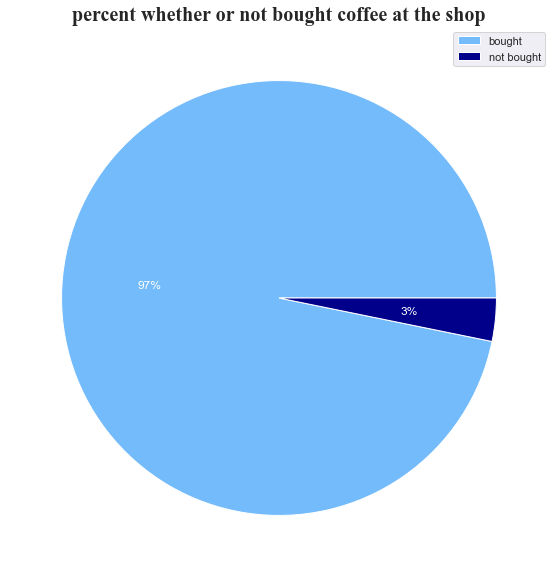

In [44]:
#create pie chart
fig = plt.figure(figsize=(15,10))
colors = ['#74BBFB', '#00008B']
plt.pie(df['bought_coffee'].value_counts().values, colors = colors, autopct='%.0f%%', textprops={'color':"w"})
plt.legend(['bought', 'not bought'])
plt.title('percent whether or not bought coffee at the shop', fontsize = 20, fontweight="bold", fontname = 'Times New Roman')
plt.show()

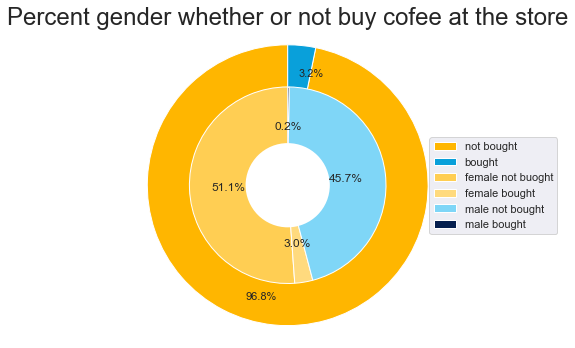

In [45]:
# thực hiện trực quan hóa dữ liệu giới tính
fig = plt.figure(figsize=(8,5))
labels = df['bought_coffee'].value_counts()
sizes = [300, 200]
# labels_vegefruit = df.groupby(['gender', 'bought_coffee'])['bought_coffee'].count().values
# sizes_vegefruit = 
colors = ['#FFB600', '#09A0DA']
colors_vegefruit = ['#FFCE53', '#FFDA7E' 
                    ,'#7FD6F7', '#06204F']

bigger = plt.pie(labels.values, labels = ['96.8%', '3.2%'],colors=colors,startangle=90, labeldistance=0.8)
smaller = plt.pie(df.groupby(['gender', 'bought_coffee'])['bought_coffee'].count(),autopct = '%1.1f%%',
                  colors=colors_vegefruit, radius=0.7,
                  startangle=90)
plt.legend(['not bought', 'bought', 'female not buoght', 'female bought', 'male not bought', 'male bought'], loc="right")
centre_circle = plt.Circle((0, 0), 0.3, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Percent gender whether or not buy cofee at the store', fontsize = 24)

plt.axis('equal')
plt.tight_layout()


plt.savefig('pieChartPercentGenderWhetherOrNotBuyCoffeeAtTheStore1')

- có khoản <b>97%</b> khách hàng không mua hàng và khoảng 3% khách hàng mua hàng
- Tỉ lệ mua coffee là rất thấp ở cả hai giới tính

In [46]:
# các thành phố mua coffee và các thành phố có ít người mua coffee
city = df.groupby('city')['bought_coffee'].count()
cityBuy = df.loc[df['bought_coffee'] == True, ['city', 'bought_coffee']].groupby('city')['bought_coffee'].count()
cityNotBuy = df.loc[df['bought_coffee'] == False, ['city', 'bought_coffee']].groupby('city')['bought_coffee'].count()

listPercentCityBuy = []
for i in city.index:
  result = 0
  result = cityBuy[i]*100/city[i]
  listPercentCityBuy.append(result)

listPercentCityNotBuy = []
for i in listPercentCityBuy:
  result = 0
  result = 100 - i
  listPercentCityNotBuy.append(result)

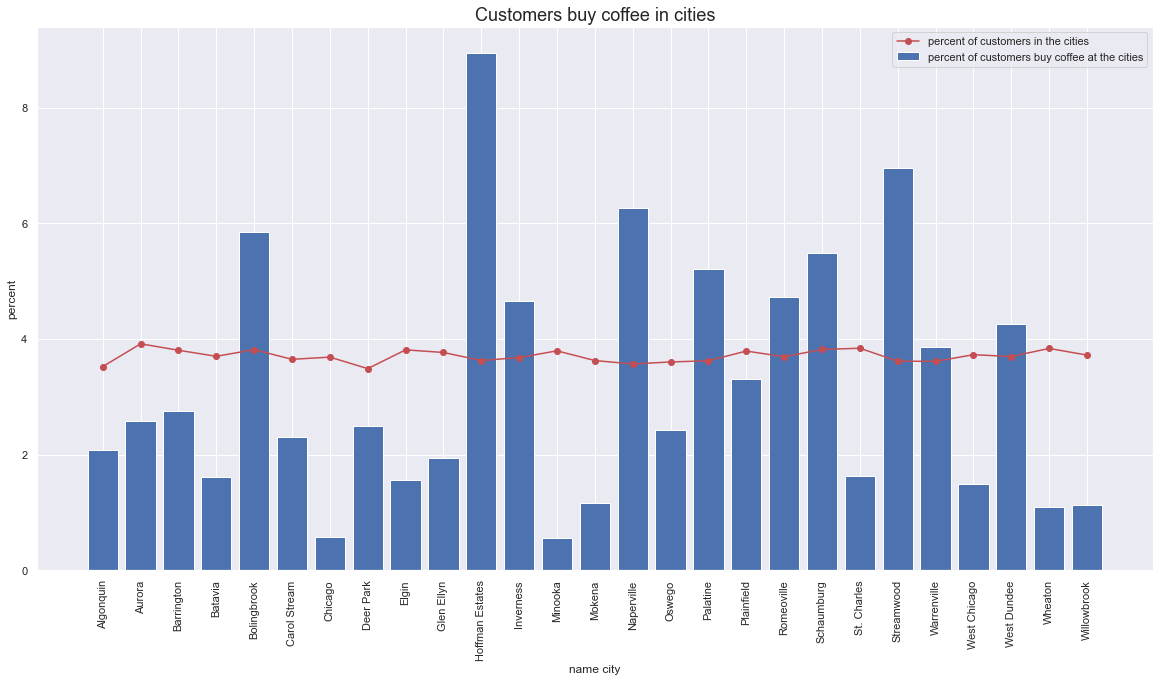

In [47]:
# liệu thành phố có ảnh hướng đến khả năng mua coffee hay không
fig = plt.figure(figsize=(20,10))
plt.plot(city.index, city.values*100/df.shape[0], marker='o',color='r')
#plt.bar(cityNotBuy.index, listPercentCityNotBuy)
plt.bar(cityBuy.index, listPercentCityBuy)

plt.legend(['percent of customers in the cities','percent of customers buy coffee at the cities'])
plt.title('Customers buy coffee in cities', fontsize = 18)
plt.xlabel('name city')
plt.ylabel('percent')
plt.xticks(rotation = 90)
plt.savefig('barchartConsumerBuyCoffee.png')

In [48]:

for x in range(len(listPercentCityBuy)):
    k = 0
    k = listPercentCityBuy[x]
    if k > 6:
        print(cityBuy.index[x],'|||||', k)


Hoffman Estates ||||| 8.950914340712224
Naperville ||||| 6.262230919765166
Streamwood ||||| 6.94980694980695


- Phân bố lượng khách hàng ở các thành phố đồng đều với nhau.
- nhưng phần lớn lượng khách hàng mua coffee tại cửa hàng là Hoffman Estates, Naperville, Streamwood.

In [49]:
def convertYear(string):
  if string == 2020:
    string = 1920
    return string
  elif string > 2015:
    string = str(string)
    string = string.replace('20', '19')
    string = int(string)
    return string
  return string

In [50]:
df['year_dob'] = df['year_dob'].apply(lambda string: convertYear(string))

In [51]:
val = df['year_dob'].value_counts()

In [52]:
idx = df.loc[(df['employment'] == 'student')&(df['year_dob'] < 1980), :].index
df.drop(index = idx, inplace= True)

In [53]:
val = val.reset_index()
val.sort_values("index", axis = 0, ascending = True,
                  inplace = True)

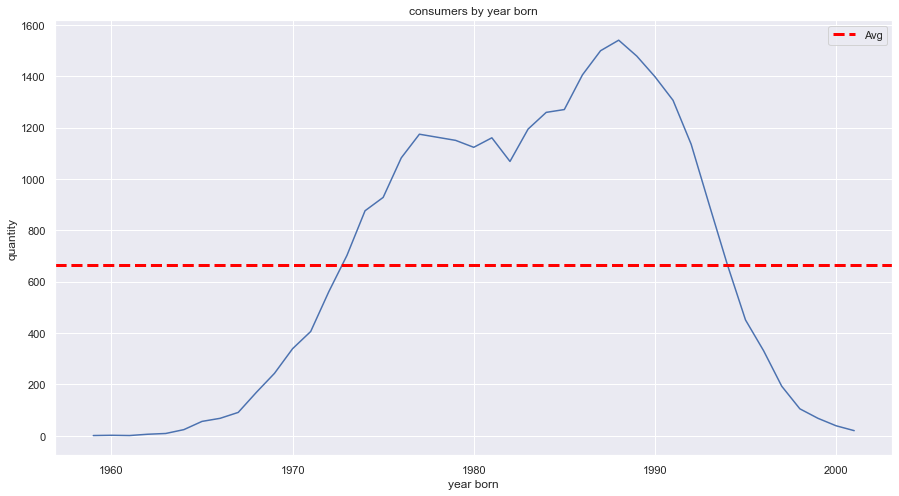

In [54]:
# năm sinh của khách hàng tiềm năng
fig = plt.figure(figsize=(15,8))

plt.plot(val['index'], val['year_dob'])
plt.title('consumers by year born')
#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(val['year_dob']), color='red', linestyle='--', linewidth=3, label='Avg')

plt.xlabel('year born')
plt.ylabel('quantity')
plt.legend()
plt.savefig('consumersBuyYearBorn.png')

- trung bình số lượng theo từng độ tuổi sẽ là khoảng 650 khách hàng.
- Lượng khách hàng thường tập trung vào năm sinh 1977 đến 1995. 

In [55]:
# xem thử employmen theo khả năng mua hàng
dataEmployment = df[['employment', 'bought_coffee']]
t = dataEmployment.loc[df['bought_coffee'] == True, :].groupby('employment')['bought_coffee'].count()

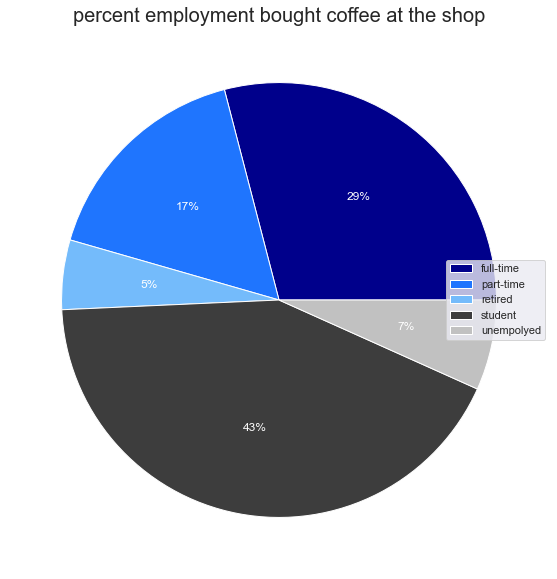

In [56]:
# hình thức làm việc của khách hàng mua hàng
fig = plt.figure(figsize=(20,10))
# define Seaborn color palette to use
palette_color = ['#00008B', '#1F75FE', '#74BBFB', '#3D3D3D', '#C1C1C1']
  
# plotting data on chart
plt.pie(t.values, colors=palette_color, autopct='%.0f%%', textprops={'color':"w"})
plt.legend(t.index, loc = 'right')
plt.title('percent employment bought coffee at the shop', fontsize = 20)
# displaying chart

plt.savefig('percentEmploymentBougtCoffeeAtTheShop.png')

- Phần lớn lượng khách hàng tập trung mua là sinh viên

In [57]:
vaxl = df.loc[df['employment'] == 'student', ['employment', 'year_dob']]['year_dob'].value_counts()

In [58]:
vaxl

1987    333
1994    314
1988    305
1993    298
1989    288
1990    271
1991    267
1986    263
1985    263
1992    246
1995    222
1984    215
1996    159
1997    108
1983    104
1981     78
1998     67
1980     55
1982     54
1999     42
2000     24
2001     13
Name: year_dob, dtype: int64

In [59]:
vaxl = vaxl.reset_index()

In [60]:

vaxl.sort_values("index", axis = 0, ascending = True,
                  inplace = True)

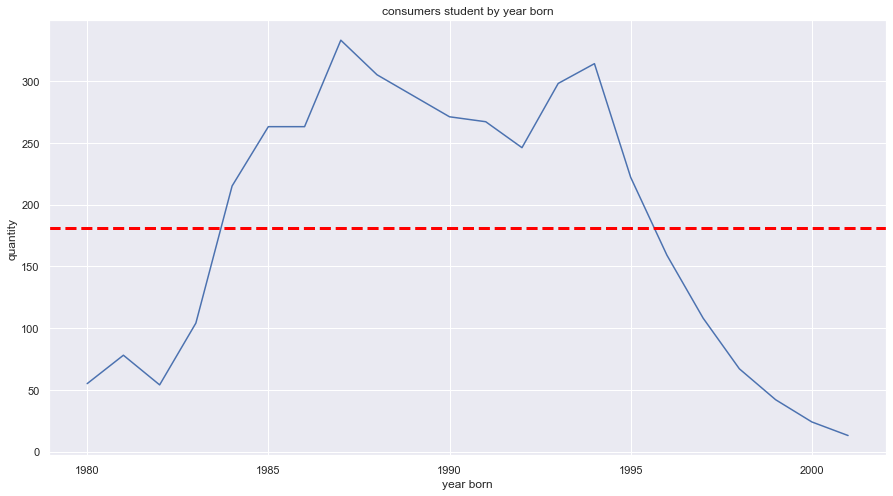

In [61]:
# năm sinh của khách hàng tiềm  hình thức student
fig = plt.figure(figsize=(15,8))
plt.plot(vaxl['index'], vaxl['year_dob'])
#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(vaxl['year_dob']), color='red', linestyle='--', linewidth=3, label='Avg')
plt.title('consumers student by year born')
plt.xlabel('year born')
plt.ylabel('quantity')

plt.savefig('consumerStudentByYearBorn.png')

- phần lớn lượng khách hàng student tập trung vào 1984 đến 1997

In [62]:
df.loc[(df['employment'] == 'student') & (df['bought_coffee'] == True), ['employment', 'year_dob']]['year_dob'].unique()

array([1990, 1994, 1985, 1982, 1992, 2000, 1995, 1983, 1989, 1991, 1988,
       1993, 1984, 1996, 1981, 1986, 1980, 1987, 1997, 1998, 1999],
      dtype=int64)

In [63]:
x = df.groupby('employment')['year_dob'].count()

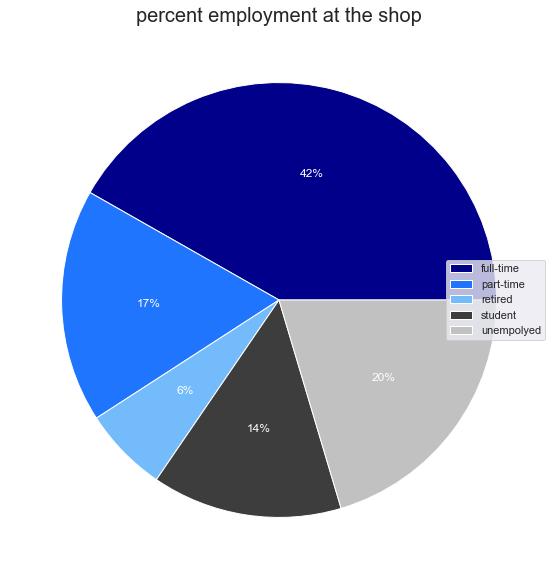

In [64]:
# hình thức làm việc của khách hàng mua hàng
fig = plt.figure(figsize=(20,10))
# define Seaborn color palette to use
palette_color = ['#00008B', '#1F75FE', '#74BBFB', '#3D3D3D', '#C1C1C1']
  
# plotting data on chart
plt.pie(x.values, colors=palette_color, autopct='%.0f%%', textprops={'color':"w"})
plt.legend(t.index, loc = 'right')
plt.title('percent employment at the shop', fontsize = 20)

plt.savefig('percentEmploymentAttheShop.png')

In [65]:
df.columns

Index(['id', 'date_contacted', 'city', 'state', 'dob', 'gender', 'employment',
       'owns_car', 'owns_coffee_machine', 'owns_home', 'beverage_preference',
       'number_of_bags_purchased_competitor', 'competitor_satisfaction',
       'bought_coffee', 'month', 'year', 'date', 'month_dob', 'year_dob',
       'date_dob'],
      dtype='object')

In [66]:
data = df[['city', 'state', 'gender', 'employment', 'owns_coffee_machine', 'owns_car', 'month', 'year', 'year_dob', 'beverage_preference', 'bought_coffee']]

In [67]:
data.head()

,city,state,gender,employment,owns_coffee_machine,owns_car,month,year,year_dob,beverage_preference,bought_coffee
0,Chicago,IL,male,full-time,no,False,9,2019,1984,beer,False
1,Wheaton,IL,female,retired,yes,True,7,2018,1983,wine,False
2,Glen Ellyn,IL,male,full-time,no,True,6,2018,1980,coffee,False
3,Hoffman Estates,IL,female,part-time,yes,True,5,2018,1974,coffee,False
4,St. Charles,IL,female,unempolyed,i don't know,True,8,2019,1988,coffee,False


In [68]:
data.groupby(['owns_car', 'bought_coffee'])['bought_coffee'].count()

owns_car  bought_coffee
False     False             3474
          True                18
True      False            23820
          True               891
Name: bought_coffee, dtype: int64

In [69]:
TrueData = data.loc[data['owns_car'] == True, ['owns_car', 'bought_coffee']].groupby([ 'bought_coffee'])['bought_coffee'].count()

In [70]:
falseData = data.loc[data['owns_car'] == False, ['owns_car', 'bought_coffee']].groupby(['bought_coffee'])['bought_coffee'].count()

<BarContainer object of 2 artists>

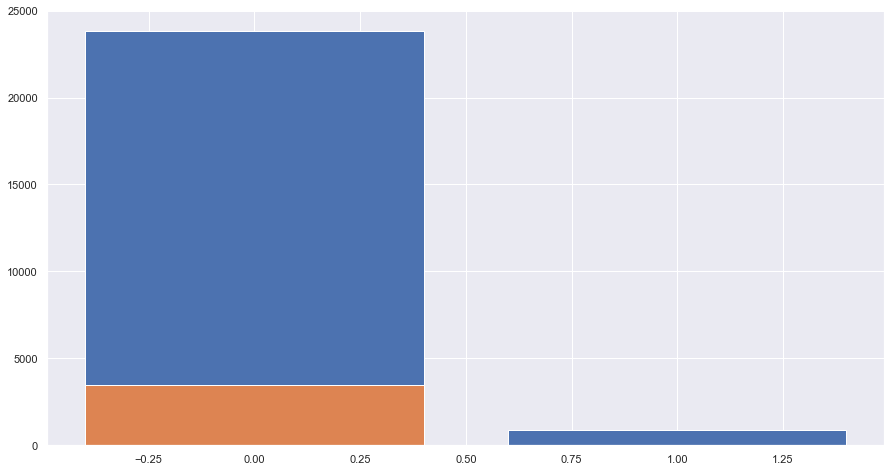

In [71]:
fig = plt.figure(figsize=(15,8))
plt.bar(TrueData.index, TrueData.values)
plt.bar(falseData.index, falseData.values)

In [72]:
TrueData.index

Index([False, True], dtype='object', name='bought_coffee')

<BarContainer object of 2 artists>

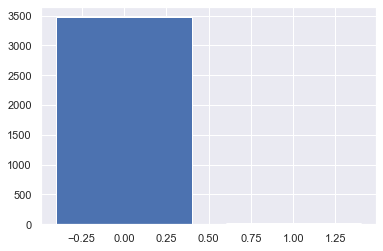

In [73]:
plt.bar(falseData.index, falseData.values)

In [74]:
def ax(name):
    x = data[name].count()
    plt.bar(list(data[name].value_counts().index), data[name].value_counts().values*100/x)

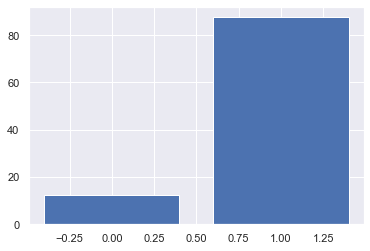

In [75]:
ax('owns_car')

In [76]:
list(data['owns_car'].value_counts().index)

[True, False]

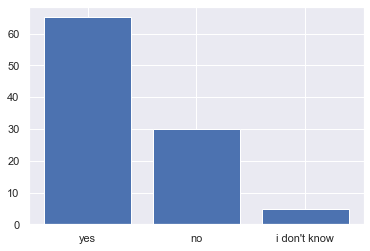

In [77]:
ax('owns_coffee_machine')

In [78]:
def ax2(name):
    da = data.loc[data['owns_coffee_machine'] == name,'bought_coffee']
    c = da.count()
    val = da.value_counts()
    plt.bar(val.index, val.values*100/c)

In [79]:
da = data.loc[data['owns_coffee_machine'] == 'yes', ['bought_coffee']]

In [80]:
c = da.count()
print(c.values)

[18373]


In [81]:
val = da.value_counts()
val

bought_coffee
False            17784
True               589
dtype: int64

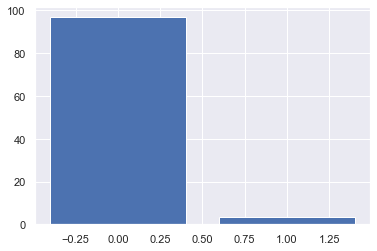

In [82]:
ax2('yes')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28203 entries, 0 to 28656
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 28203 non-null  object
 1   state                28203 non-null  object
 2   gender               28203 non-null  object
 3   employment           28203 non-null  object
 4   owns_coffee_machine  28203 non-null  object
 5   owns_car             28203 non-null  bool  
 6   month                28203 non-null  int64 
 7   year                 28203 non-null  int64 
 8   year_dob             28203 non-null  int64 
 9   beverage_preference  28203 non-null  object
 10  bought_coffee        28203 non-null  bool  
dtypes: bool(2), int64(3), object(6)
memory usage: 2.2+ MB


In [84]:
data.to_csv('dataTableau.csv')